# Analysis of the NN used to approximate the 1D Poisson equation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)

In [3]:
tf.random.set_seed(0)

In [4]:
pi =  tf.constant(np.pi, dtype=DTYPE)

2022-06-15 13:06:53.276291: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-15 13:06:53.276612: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-15 13:06:53.277650: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
plt.style.use('rc.mplstyle')

In [6]:
# Replace with desired local directory
folder = '/home/jakob/Documents/BachelorThesis/ThesisTeX/graphics/chapter2'

In [7]:
def u(x):
    return tf.sin(2 * pi * x)

In [8]:
def FFNN(num_hidden_layers, num_neurons_per_layer):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(1))
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons_per_layer,
                    activation=tf.keras.activations.get('tanh'),
                    kernel_initializer='glorot_normal')) 
    model.add(tf.keras.layers.Dense(1)) 
    return model

In [9]:
m_train = 10
x_train = tf.linspace(-1.0, 0.0, num=m_train)
x_train = tf.reshape(x_train, [m_train, 1])
u_train = u(x_train)
u_train = tf.reshape(u_train, [m_train, 1])

m_test = 100
x_test = tf.linspace(-1.0, 1.0, num=m_test)
x_test = tf.reshape(x_test, [m_test, 1])

x_exact = np.linspace(-1, 1, num=1000)

In [10]:
model = FFNN(3, 32)

### Plot training process

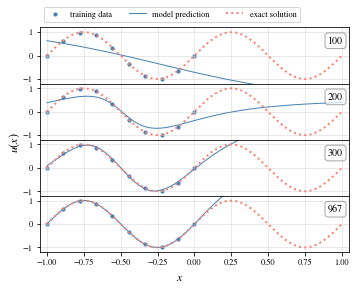

In [11]:
fig, axes = plt.subplots(4,1,figsize=(5,4),sharex = True)

axes = axes.flatten()

fig.supxlabel('$x$')
fig.supylabel('$u(x)$')

epochs = ['100', '200', '300', '967']
props = dict(boxstyle='round', edgecolor='grey', facecolor='white', alpha=0.7)

for i in range(4):
    current_model = model.load_weights(f'nn_weights/{epochs[i]}')
    line1 = axes[i].scatter(x_train, u_train, s=40, color='steelblue')
    line2, = axes[i].plot(x_test, model(x_test), color='steelblue')
    line3, = axes[i].plot(x_exact, u(x_exact), linestyle=':', linewidth=2, color='salmon')
    if i == 0:
        line1.set_label('training data')
        line2.set_label('model prediction')
        line3.set_label('exact solution')
    axes[i].text(0.98, 0.85, epochs[i], transform=axes[i].transAxes, fontsize=10,
           verticalalignment='top', horizontalalignment='right', bbox=props, zorder=10)
    axes[0].legend(loc='lower left', ncol=3, bbox_to_anchor=(0,1.03))
    axes[i].set_ylim(-1.2,1.2)
    axes[i].set_xlim(-1.05,1.05)

fig.subplots_adjust(hspace=0, left=.11, right=.97, top=.9, bottom=.12)
fig.savefig('trainingprocess.pdf')
fig.savefig(f'{folder}/trainingprocess.pdf')
plt.show()

### Plot loss dynamics

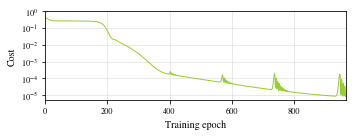

In [12]:
cost_epoch = np.loadtxt('cost_nn.txt')

fig, ax = plt.subplots(1, figsize=(5,2))
ax.plot(cost_epoch, color='yellowgreen')
ax.set_xlim(0, np.argmin(np.array(cost_epoch)))
ax.set_yscale('log')
ax.set_yticks([10, 1, 0.1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
ax.set_ylim(0.000005, 1)
ax.set_ylabel('Cost')
ax.set_xlabel('Training epoch')
fig.tight_layout()
fig.savefig('loss_epoch.pdf')
fig.savefig(f'{folder}/loss_epoch.pdf')
plt.show()